In [1]:
import os

#path to training dog images
train_dog=os.path.join('./data/train/dogs')

#path to training cat images
train_cat=os.path.join('./data/train/cats')

#path to validation dog images
validation_dog=os.path.join('./data/validation/dogs')

#path to validation cat images
validation_cat=os.path.join('./data/validation/cats')

In [2]:
#no of training examples
print(len(os.listdir(train_dog)))
print(len(os.listdir(train_cat)))
print(len(os.listdir(validation_dog)))
print(len(os.listdir(validation_cat)))

1502
1502
500
500


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameters for our graph; we'll output images in a 4*4 configuration
nrows=4
ncols=4

#Index for iterating over images
pic_index=0

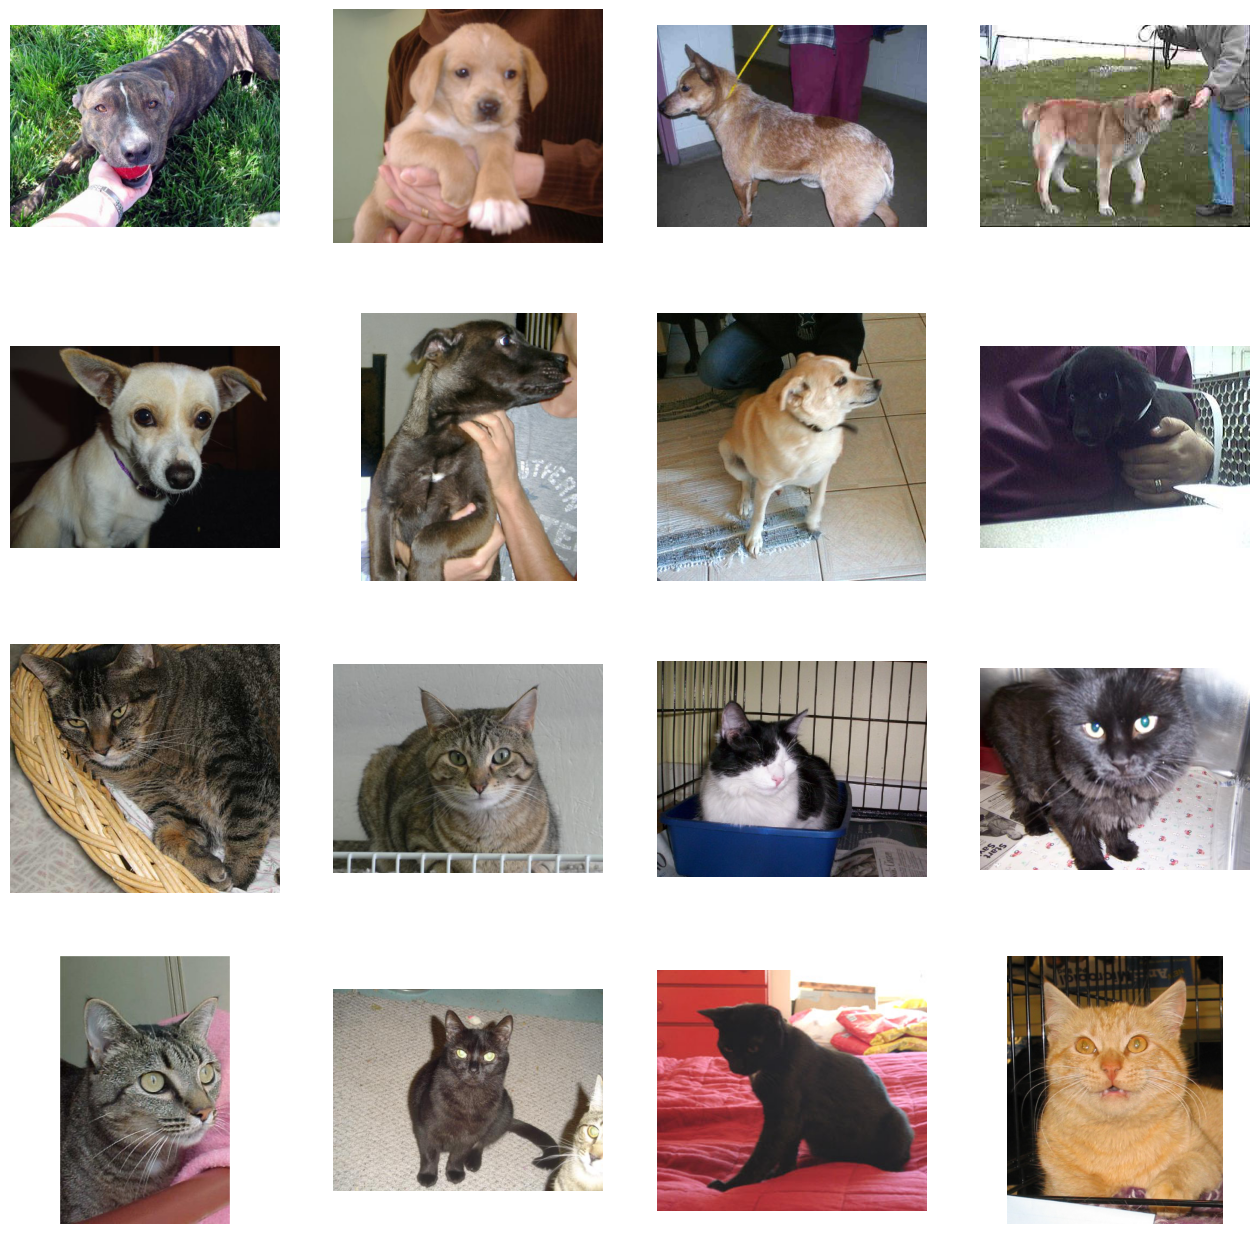

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dog_pix = [os.path.join(train_dog, fname)
                for fname in os.listdir(train_dog)[pic_index-8:pic_index]]
next_cat_pix = [os.path.join(train_cat, fname)
                for fname in os.listdir(train_cat)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dog_pix+next_cat_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
print(tf.__version__)

2023-06-23 13:54:48.370226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 13:54:52.599181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-23 13:55:00.443974: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-23 13:55:00.875114: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-23 13:55:00.875421: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_exec

2.12.0


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [7]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled by 1./255
train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

#Flow training images in batches of 20 using train_datagen generator
train_generator=train_datagen.flow_from_directory(
    './data/train',
    target_size=(150,150),
    batch_size=15,
    class_mode='binary'
)

#Flow validation images in batches of 20 using validation_datagen generator
validation_generator=validation_datagen.flow_from_directory(
    './data/validation',
    target_size=(150,150),
    batch_size=15,
    class_mode='binary'
)

Found 3003 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=200,
      epochs=20,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=67)

Epoch 1/20


2023-06-23 14:03:34.616066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - ETA: 0s - loss: 0.6493 - accuracy: 0.6258

2023-06-23 14:04:14.913006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - 59s 280ms/step - loss: 0.6493 - accuracy: 0.6258 - val_loss: 0.5862 - val_accuracy: 0.6780
Epoch 2/20
200/200 [==============================] - 53s 263ms/step - loss: 0.5853 - accuracy: 0.6854 - val_loss: 0.5649 - val_accuracy: 0.7020
Epoch 3/20
200/200 [==============================] - 49s 247ms/step - loss: 0.5286 - accuracy: 0.7306 - val_loss: 0.5362 - val_accuracy: 0.7430
Epoch 4/20
200/200 [==============================] - 47s 236ms/step - loss: 0.4754 - accuracy: 0.7697 - val_loss: 0.4954 - val_accuracy: 0.7600
Epoch 5/20
200/200 [==============================] - 46s 231ms/step - loss: 0.4138 - accuracy: 0.8052 - val_loss: 0.7844 - val_accuracy: 0.6750
Epoch 6/20
200/200 [==============================] - 48s 238ms/step - loss: 0.3503 - accuracy: 0.8507 - val_loss: 0.5915 - val_accuracy: 0.7450
Epoch 7/20
200/200 [==============================] - 48s 238ms/step - loss: 0.2610 - accuracy: 0.8926 - val_loss: 0.6036 - val_accuracy: 0.7

In [12]:
from tensorflow.keras.models import load_model
model.save('dogvcat-v1.h5')